In [5]:
import pandas as pd
import json
import ast

filename = "housing_data.csv"

In [6]:
col_list = ["AdditionalFields"]

df = pd.read_csv(filename, usecols=col_list)

k = 0

for i, j in df.iterrows():

    if i == 0:
        a_json = json.loads(j["AdditionalFields"])

        data = ast.literal_eval(a_json)
        a = list(data.items())

        additional_df = pd.DataFrame(a)
        additional_df = additional_df.T

    else:

        a_json = json.loads(j["AdditionalFields"])
        data = ast.literal_eval(a_json)
        a = list(data.values())
        new_row = pd.DataFrame(a).T
        additional_df = additional_df.append(new_row)

    k = k + 1

In [7]:
new_header = additional_df.iloc[0] 
additional_df = additional_df[1:] 
additional_df.columns = new_header 

In [8]:
additional_df = additional_df.filter(['sold_price', 'sqarefootage','Type','Style','Bedrooms','Bathrooms','Kitchens', 'Rooms', 'Groceries #1 distance',
 'Groceries #2 distance',
 'Groceries #3 distance', 'Restaurants #1 distance',
 'Restaurants #2 distance',
 'Restaurants #3 distance','Coffee #1 distance',
 'Coffee #2 distance',
 'Coffee #3 distance','Gas Station #1 distance',
 'Gas Station #2 distance',
 'Gas Station #3 distance','Medical Care #1 distance',
 'Medical Care #2 distance',
 'Medical Care #3 distance','Park #1 distance',
 'Park #2 distance',
 'Park #3 distance','Library #1 distance',
 'Library #2 distance',
 'Library #3 distance','Pharmacy #1 distance',
 'Pharmacy #2 distance',
 'Pharmacy #3 distance','Mall #1 distance',
 'Mall #2 distance',
 'Mall #3 distance'])

In [9]:
ar = ['Groceries #1 distance',
 'Groceries #2 distance',
 'Groceries #3 distance', 'Restaurants #1 distance',
 'Restaurants #2 distance',
 'Restaurants #3 distance','Coffee #1 distance',
 'Coffee #2 distance',
 'Coffee #3 distance','Gas Station #1 distance',
 'Gas Station #2 distance',
 'Gas Station #3 distance','Medical Care #1 distance',
 'Medical Care #2 distance',
 'Medical Care #3 distance','Park #1 distance',
 'Park #2 distance',
 'Park #3 distance','Library #1 distance',
 'Library #2 distance',
 'Library #3 distance','Pharmacy #1 distance',
 'Pharmacy #2 distance',
 'Pharmacy #3 distance','Mall #1 distance',
 'Mall #2 distance',
 'Mall #3 distance']


for field in ar:
    additional_df = additional_df[additional_df[field] != "km"]
    

additional_df = additional_df[additional_df["sqarefootage"] != "n/a"]    

In [17]:

fields = [[ 'Bedrooms','Bathrooms','Kitchens', 'Rooms', 'Groceries #1 distance',
 'Groceries #2 distance',
 'Groceries #3 distance', 'Restaurants #1 distance',
 'Restaurants #2 distance',
 'Restaurants #3 distance','Coffee #1 distance',
 'Coffee #2 distance',
 'Coffee #3 distance','Gas Station #1 distance',
 'Gas Station #2 distance',
 'Gas Station #3 distance','Medical Care #1 distance',
 'Medical Care #2 distance',
 'Medical Care #3 distance','Park #1 distance',
 'Park #2 distance',
 'Park #3 distance','Library #1 distance',
 'Library #2 distance',
 'Library #3 distance','Pharmacy #1 distance',
 'Pharmacy #2 distance',
 'Pharmacy #3 distance','Mall #1 distance',
 'Mall #2 distance',
 'Mall #3 distance']]


for field in fields:
    additional_df[field] = additional_df[field].astype(str).astype(float)

In [25]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

d={}

print(len(additional_df.columns))

for i in range(len(additional_df.columns)):
    #if column is categorical
    if type(additional_df.iloc[0,i])==str:
        print("categorical")
        print(additional_df.iloc[0,i])

        le = LabelEncoder()
        additional_df[additional_df.columns[i]] = le.fit_transform(additional_df[additional_df.columns[i]])
        
        print(le.classes_)
        
        print(additional_df[additional_df.columns[i]])
        series = additional_df[additional_df.columns[i]]
        
        d[series.name] = {}
        
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        
        d[series.name] = le_name_mapping

35
categorical
526,800
['1,000,000' '1,000,005' '1,000,500' ... '999,000' '999,880' '999,999']
1     854
0     820
0     739
0    1105
0    1220
     ... 
0    1641
0    1007
0     748
0    1385
0    1485
Name: sold_price, Length: 5317, dtype: int64
categorical
500-599
['0-499' '1' '1000-1199' '1100-1299' '1100-1500' '1200-1399' '1400-1599'
 '1500-2000' '1600-1799' '1800-1999' '2000-2249' '2000-2500' '2250-2499'
 '2500-2749' '2500-3000' '2750-2999' '3000-3249' '3000-3500' '3500-5000'
 '500-599' '5000+' '600-699' '700-1100' '700-799' '700-899' '800-899' '9'
 '900-1099' '900-999' '< 700']
1    19
0    21
0    25
0    25
0    19
     ..
0    22
0    28
0     5
0    28
0    23
Name: sqarefootage, Length: 5317, dtype: int64
categorical
Condo Apt
['Att/Row/Twnhouse' 'Co-Op Apt' 'Co-Ownership Apt' 'Comm Element Condo'
 'Condo Apt' 'Condo Townhouse' 'Det Condo' 'Detached' 'Duplex' 'Link'
 'Multiplex' 'Other' 'Semi-Det Condo' 'Semi-Detached' 'Store W/Apt/Offc'
 'Triplex']
1    4
0    4
0    4
0

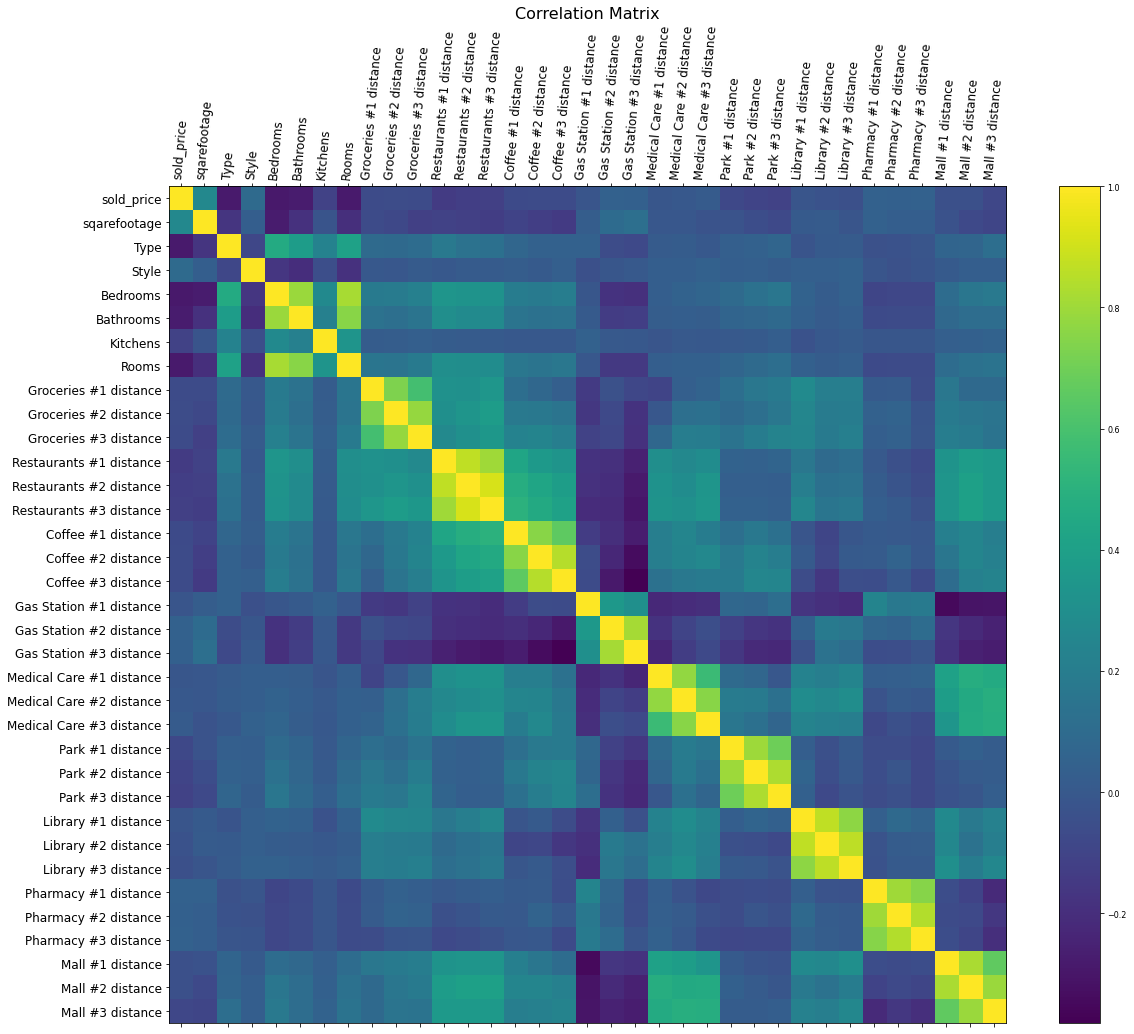

In [35]:
import seaborn as sn
import matplotlib.pyplot as plt

df = additional_df
    
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=12, rotation=85)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Correlation Matrix', fontsize=16);


In [24]:
df.head()

,sold_price,sqarefootage,Type,Style,Bedrooms,Bathrooms,Kitchens,Rooms,Groceries #1 distance,Groceries #2 distance,...,Park #3 distance,Library #1 distance,Library #2 distance,Library #3 distance,Pharmacy #1 distance,Pharmacy #2 distance,Pharmacy #3 distance,Mall #1 distance,Mall #2 distance,Mall #3 distance
1,"526,800",500-599,Condo Apt,Apartment,1.0,1.0,1.0,4.0,0.44,0.60,...,1.31,1.21,1.26,1.26,0.14,0.39,1.17,1.22,1.46,2.00
0,"507,000",600-699,Condo Apt,Apartment,1.0,1.0,1.0,5.0,0.12,0.13,...,1.62,1.19,1.19,1.53,0.86,1.66,1.82,1.74,4.03,4.14
0,"465,000",800-899,Condo Apt,Apartment,2.0,2.0,1.0,5.0,1.32,2.01,...,1.65,0.78,0.83,2.15,2.48,2.07,2.32,2.36,3.04,3.22
0,"630,000",800-899,Condo Apt,Apartment,2.0,2.0,1.0,5.0,0.88,1.59,...,1.76,1.33,1.33,1.33,1.74,2.53,2.48,1.55,1.61,1.84
0,"682,000",500-599,Condo Apt,Multi-Level,1.0,1.0,1.0,5.0,0.28,0.38,...,0.61,0.58,1.00,1.25,0.38,0.96,1.29,0.36,0.78,1.27


In [ ]:
#scatterplot
sns.set()
cols = ['sold_price', 'sqarefootage','Type','Style','Bedrooms','Bathrooms','Kitchens', 'Rooms', 'Groceries #1 distance',
 'Groceries #2 distance',
 'Groceries #3 distance', 'Restaurants #1 distance',
 'Restaurants #2 distance',
 'Restaurants #3 distance','Coffee #1 distance',
 'Coffee #2 distance',
 'Coffee #3 distance','Gas Station #1 distance',
 'Gas Station #2 distance',
 'Gas Station #3 distance','Medical Care #1 distance',
 'Medical Care #2 distance',
 'Medical Care #3 distance','Park #1 distance',
 'Park #2 distance',
 'Park #3 distance','Library #1 distance',
 'Library #2 distance',
 'Library #3 distance','Pharmacy #1 distance',
 'Pharmacy #2 distance',
 'Pharmacy #3 distance','Mall #1 distance',
 'Mall #2 distance',
 'Mall #3 distance']
sns.pairplot(df[cols], height = 2.5)
plt.show();